# get data from exoplanet.eu with PyAstronomy- example

In [1]:
# from __future__ import print_function, division
# from PyAstronomy import pyasl
# import matplotlib.pylab as plt

# # Instantiate exoplanetEU2 object
# v = pyasl.ExoplanetEU2()

# # Show the available data
# v.showAvailableData()
# print()

# # Get a list of all available column names
# acs = v.getColnames()
# print("Available column names: " + ", ".join(acs))
# print()

# # Select data by planet name (returns a dictionary)
# #print(v.selectByPlanetName("CoRoT-2 b"))
# #print()

# # Get all data as an astropy table
# at = v.getAllDataAPT()

# # Export all data as a pandas DataFrame
# pd = v.getAllDataPandas()

# # Plot mass vs. SMA
# plt.title("Mass vs. SMA")
# plt.xlabel("[" + v.getUnitOf("mass") + "]")
# plt.ylabel("[" + v.getUnitOf("semi_major_axis") + "]")
# plt.loglog(at["mass"], at["semi_major_axis"], 'b.')
# plt.show()

# Configs

## imports

'C:\\Users\\Jason\\.matplotlib\\matplotlibrc'

In [3]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from PyAstronomy.pyasl import ExoplanetEU2
import pandas as pd


## Get Data

In [5]:
# get data
db_exoplanetEU = ExoplanetEU2()
db_colnames = db_exoplanetEU.getColnames()

# print('Available column names: ')
# for column in sorted(db_colnames):
#     print()'   ', column)


tab_exoplanetEU = db_exoplanetEU.getAllDataAPT()

panda_exoplanetEU = db_exoplanetEU.getAllDataPandas()
# print(set(panda_exoplanetEU['detection_type']))



In [6]:
params = {'legend.fontsize': 24,
             'axes.labelsize': 30,
             'axes.titlesize':30,
             'xtick.labelsize':24,
             'ytick.labelsize':24}
    
plt.rcParams.update(params)

FIGSIZE=(15,8)

# PLOTS

##  mass vs semi-major axis plot

Microlensing
Pulsar
Other
Astrometry
Imaging
Radial Velocity
Primary Transit
TTV
Primary Transit, TTV


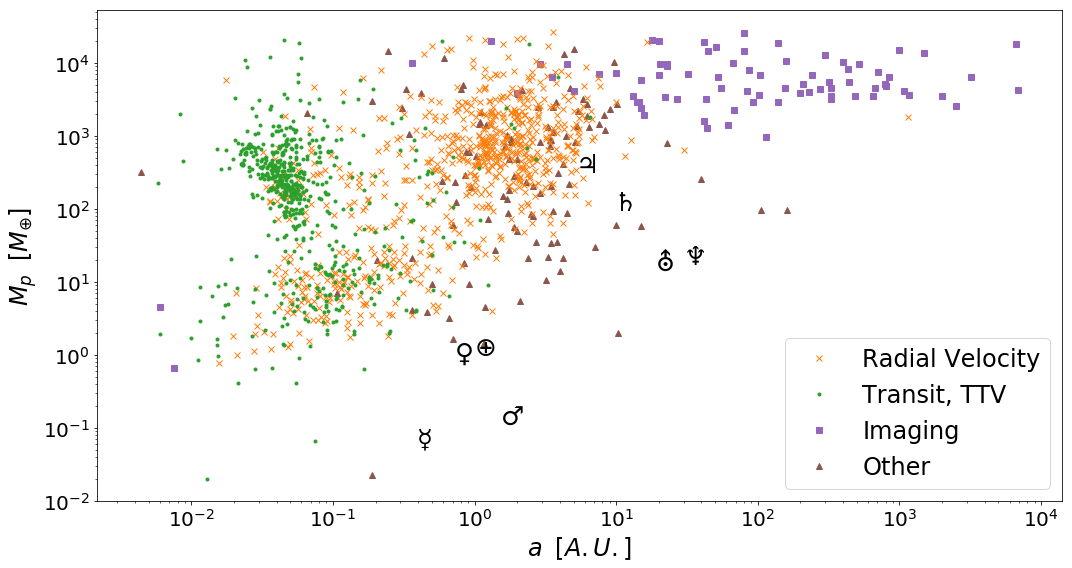

In [27]:
# make mass vs period/semi-major axis plot

fig_mass_period, ax_mass_period = plt.subplots(1, figsize = FIGSIZE)


methods = ['Microlensing',  'Pulsar', 'Other','Astrometry', 'Imaging','Radial Velocity','Primary Transit', 'TTV','Primary Transit, TTV']
colors = {'Astrometry':'C5' , 'Primary Transit':"C2" , 'TTV':"C2" , 'Primary Transit, TTV':"C2", \
          'Microlensing': 'C5', 'Radial Velocity': 'C1', 'Pulsar': 'C5', 'Imaging':'C4','Other':'C5'}
m1,m2,m4,m5 = "x", ".", "s", "^"
markers = {'Astrometry':m5 , 'Primary Transit':m2 , 'TTV':m2 , 'Primary Transit, TTV': m2, \
          'Microlensing': m5, 'Radial Velocity': m1, 'Pulsar': m5, 'Imaging':m4,'Other':m5}

for method in methods:
    print(method)
    planet_data = panda_exoplanetEU['detection_type'] == method
    
    ax_mass_period.loglog(panda_exoplanetEU[planet_data]['semi_major_axis'],
                          panda_exoplanetEU[planet_data]['mass']*319., 
                          markers[method], label = method, color = colors[method], linewidth=2)

ax_mass_period.legend(fontsize= 24)
# fix legend for multis:
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label in ['Radial Velocity', 'Primary Transit, TTV', 'Imaging', 'Other']:
    newLabels.append(label.replace('Primary Transit, TTV','Transit, TTV'))
    newHandles.append(handle)
order = [2,3,1,0]
plt.legend([newHandles[index] for index in order], [newLabels[index] for index in order],fontsize= 24)


# ax_mass_period.set_yscale('log')
ax_mass_period.set_xlabel(r'$a\;\;[A.U.]$', fontsize = 24)
ax_mass_period.set_ylabel(r'$M_{p}\;\;[M_{\oplus}]$', fontsize = 24)
for tick in ax_mass_period.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax_mass_period.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    

    
planet_mass = [0.0553,0.815,1,0.11,317.8,95.2, 14.6, 17.2] # Earth mass
planet_au = [0.39, 0.72, 1,1.524, 5.203, 9.539, 19.18, 30.06, 39.53]
symbol = [u"\u263F", u"\u2640",  u"\u2295",
          u"\u2642", u"\u2643", u"\u2644",
         u"\u26E2",  u"\u2646"]
for d,m,s in zip(planet_au, planet_mass, symbol):
    plt.annotate(s, (d, m), fontsize=26, color="k")    
    
    
# ax_mass_period.set_ylabel('Detected planets')
# ax_mass_period.set_xlabel('Year')
fig_mass_period.tight_layout()


fig_mass_period.savefig('exoplanetEU_a_mass.pdf', format = 'pdf')    
    
plt.show()

## mass vs period

Microlensing
Pulsar
Other
Astrometry
Imaging
Radial Velocity
Primary Transit
TTV
Primary Transit, TTV


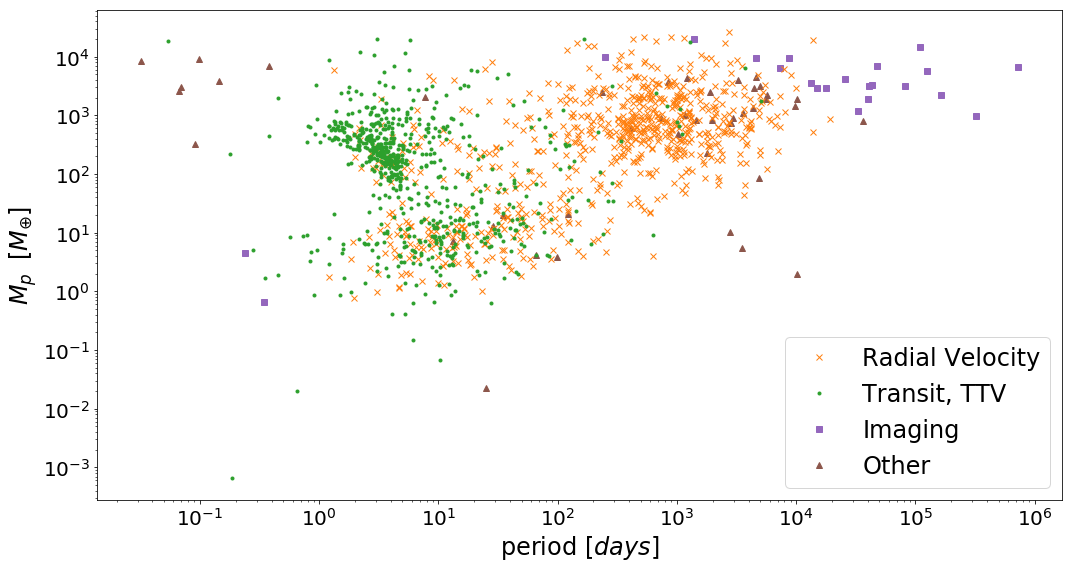

In [28]:
# make mass vs period/semi-major axis plot

fig_mass_period, ax_mass_period = plt.subplots(1, figsize = FIGSIZE)


methods = ['Microlensing',  'Pulsar', 'Other','Astrometry', 'Imaging','Radial Velocity','Primary Transit', 'TTV','Primary Transit, TTV']
colors = {'Astrometry':'C5' , 'Primary Transit':"C2" , 'TTV':"C2" , 'Primary Transit, TTV':"C2", \
          'Microlensing': 'C5', 'Radial Velocity': 'C1', 'Pulsar': 'C5', 'Imaging':'C4','Other':'C5'}
m1,m2,m4,m5 = "x", ".", "s", "^"
markers = {'Astrometry':m5 , 'Primary Transit':m2 , 'TTV':m2 , 'Primary Transit, TTV': m2, \
          'Microlensing': m5, 'Radial Velocity': m1, 'Pulsar': m5, 'Imaging':m4,'Other':m5}

for method in methods:
    print(method)
    planet_data = panda_exoplanetEU['detection_type'] == method
    
    ax_mass_period.loglog(panda_exoplanetEU[planet_data]['orbital_period'],
                          panda_exoplanetEU[planet_data]['mass']*319.,
                          markers[method], label = method, color = colors[method])

ax_mass_period.legend(fontsize= 24)
# fix legend for multis:
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label in ['Radial Velocity', 'Primary Transit, TTV', 'Imaging', 'Other']:
    newLabels.append(label.replace('Primary Transit, TTV','Transit, TTV'))
    newHandles.append(handle)
order = [2,3,1,0]
plt.legend([newHandles[index] for index in order], [newLabels[index] for index in order],fontsize= 24)


# ax_mass_period.set_yscale('log')
ax_mass_period.set_xlabel(r'period $[days]$', fontsize = 24)
ax_mass_period.set_ylabel(r'$M_{p}\;\;[M_{\oplus}]$', fontsize = 24)
for tick in ax_mass_period.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax_mass_period.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    

# ax_mass_period.set_ylabel('Detected planets')
# ax_mass_period.set_xlabel('Year')
fig_mass_period.tight_layout()
# params = {'legend.fontsize': 20,
#              'axes.labelsize': 20,
#              'axes.titlesize':'x-large',
#              'xtick.labelsize':20,
#              'ytick.labelsize':20}
    
# plt.rcParams.update(params)

fig_mass_period.savefig('exoplanetEU_period_mass.pdf', format = 'pdf')    
    
plt.show()

## 2. mass vs radius plot

In [9]:
# # make mass vs period/semi-major axis plot

# fig_mass_radius, ax_mass_radius = plt.subplots(1, figsize = (20,12))



# methods = ['Radial Velocity', 'Astrometry', 'Primary Transit', 'TTV','Primary Transit, TTV',  'Imaging', 'Microlensing',  'Pulsar', 'Other']

# colors = {'Astrometry':'C1' , 'Primary Transit':"C2" , 'TTV':"C7" , 'Primary Transit, TTV':"C8", 'Microlensing': 'C3', 'Radial Velocity': 'C0', 'Pulsar': 'C4', 'Imaging':'C5','Other':'C6'}


# numMassAndRadius =  (pd.notnull(panda_exoplanetEU['mass']))  & (pd.notnull(panda_exoplanetEU['radius']))

# # print(numMassAndRadius)
# print('mass and radius: ', len(panda_exoplanetEU[numMassAndRadius]['mass']), '/', len(panda_exoplanetEU['mass']))

# for method in methods:
# #     print(method)
    
# #     planet_data1 = (panda_exoplanetEU['detection_type'] == method) & (panda_exoplanetEU['radius_detection_type'] =='Primary Transit')
    
# #     ax_mass_radius.loglog(panda_exoplanetEU[planet_data1]['mass']*319.,panda_exoplanetEU[planet_data1]['radius']*11.,'o', color = colors[method], marker = 'o', markersize = 8)
    
# #     planet_data2 = (panda_exoplanetEU['detection_type'] == method) & (panda_exoplanetEU['mass_detection_type'] =='Radial Velocity')
    
# #     ax_mass_radius.loglog(panda_exoplanetEU[planet_data2]['mass']*319.,panda_exoplanetEU[planet_data2]['radius']*11.,'o', label = method, color = colors[method], marker = '*', markersize = 12)


# # for method in methods:
#     print(method)
    
#     planet_data1 = (panda_exoplanetEU['detection_type'] == method) #& (panda_exoplanetEU['radius_detection_type'] =='Primary Transit')
    
#     ax_mass_radius.errorbar(panda_exoplanetEU[planet_data1]['mass']*319., \
#                           panda_exoplanetEU[planet_data1]['radius']*11.,
#                         xerr = [panda_exoplanetEU[planet_data1]['mass_err_min']*319.,panda_exoplanetEU[planet_data1]['mass_err_max']*319.],
#                             yerr = [panda_exoplanetEU[planet_data1]['radius_error_min']*11.,panda_exoplanetEU[planet_data1]['radius_error_max']*11.],
#                             linestyle='None', label = method, color = colors[method], marker = 'o', markersize = 8)
    
# #     planet_data2 = (panda_exoplanetEU['detection_type'] == method) & (panda_exoplanetEU['mass_detection_type'] == 'Radial Velocity')
    
# #     ax_mass_radius.errorbar(panda_exoplanetEU[planet_data1]['mass']*319., \
# #                           panda_exoplanetEU[planet_data1]['radius']*11.,
# #                         xerr = [panda_exoplanetEU[planet_data1]['mass_err_min']*319.,panda_exoplanetEU[planet_data1]['mass_err_max']*319.],
# #                             yerr = [panda_exoplanetEU[planet_data1]['radius_error_min']*11.,panda_exoplanetEU[planet_data1]['radius_error_max']*11.],
# #                             linestyle='None',  label = method, color = colors[method], marker = '*', markersize = 12)
    
    
# # density of some elements kg/m3
# # from https://physics.info/density/
# rho_water = 1000. 
# rho_hydrogen = 0.082 
# rho_iron = 7870.
# # from NASA Solar System fact sheet
# rho_earth = 5515.
# rho_jupiter = 1326.
# rho_saturn = 687.

# # constants
# M_EARTH = 5.972e24    # kg
# R_EARTH = 6371.       # km

# # density = m / vol = m /(4/3 pi r^3)
# def fn_mass_from_radius(radius, density):
#     ''' INPUT:  radius in m
#                 density in kg/m3
#         OUTPUT: mass in kg
#     '''
#     radius *= 1000.
#     mass_kg = density * (4./3.) * np.pi * (radius**3.)
    
#     return mass_kg

# radius_vector = np.arange(.5, 26., 0.05) * R_EARTH

# # constant density lines
# # NOT SURE IF THIS CAN BE DONE...
# # plt.loglog([ fn_mass_from_radius(radius, rho_earth) / (M_EARTH) for radius in radius_vector], radius_vector/R_EARTH , '-r')
# # plt.loglog(1., 1., 'r*', markersize = 24)


# # plt.loglog([ fn_mass_from_radius(radius, rho_jupiter) / (M_EARTH) for radius in radius_vector], radius_vector/R_EARTH , '-b')
# # plt.loglog(319., 11., 'b*', markersize = 24)




# ax_mass_radius.legend(fontsize= 24)
# # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # fix legend for multis:
# handles, labels = plt.gca().get_legend_handles_labels()
# newLabels, newHandles = [], []

# print(labels)
# for handle, label in zip(handles, labels):
# #   if label in ['Radial Velocity', 'Astrometry', 'Primary Transit, TTV', 'Microlensing',  'Pulsar', 'Imaging', 'Other']:
#   if label in methods:
#     newLabels.append(label)
#     newHandles.append(handle)
# leg = ax_mass_radius.legend(newHandles, newLabels,fontsize= 24)
# leg.get_frame().set_alpha(0.5)


# ax_mass_radius.set_xscale('log')
# ax_mass_radius.set_yscale('log')

# ax_mass_radius.set_ylabel(r'$log(R_{planet})\;\;[R_{\oplus}]$', fontsize = 24)
# ax_mass_radius.set_xlabel(r'$log(M_{planet})\;\;[M_{\oplus}]$', fontsize = 24)
# for tick in ax_mass_radius.xaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
# for tick in ax_mass_radius.yaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
# plt.show()

## 2. mass vs radius plot #2

In [10]:
# # make mass vs period/semi-major axis plot

# fig_mass_radius, ax_mass_radius = plt.subplots(1, figsize = (20,12))



# methods = [ 'Astrometry', 'Primary Transit', 'TTV','Primary Transit, TTV',  'Imaging', 'Microlensing',  'Pulsar', 'Other','Radial Velocity']

# colors = {'Astrometry':'C5' , 'Primary Transit':"C2" , 'TTV':"C2" , 'Primary Transit, TTV':"C2", 'Microlensing': 'C5', 'Radial Velocity': 'C1', 'Pulsar': 'C5', \
#           'Imaging':'C4','Other':'C5'}

# numMassAndRadius =  (pd.notnull(panda_exoplanetEU['mass']))  & (pd.notnull(panda_exoplanetEU['radius']))

# # print(numMassAndRadius)
# print('mass and radius: ', len(panda_exoplanetEU[numMassAndRadius]['mass']), '/', len(panda_exoplanetEU['mass']))

# for method in methods:
    
#     planet_data1 = (panda_exoplanetEU['detection_type'] == method) #& (panda_exoplanetEU['radius_detection_type'] =='Primary Transit')
    
#     ax_mass_radius.errorbar(panda_exoplanetEU[planet_data1]['mass']*319., \
#                           panda_exoplanetEU[planet_data1]['radius']*11.,
#                         xerr = [panda_exoplanetEU[planet_data1]['mass_err_min']*319.,panda_exoplanetEU[planet_data1]['mass_err_max']*319.],
#                             yerr = [panda_exoplanetEU[planet_data1]['radius_error_min']*11.,panda_exoplanetEU[planet_data1]['radius_error_max']*11.],
#                             linestyle='None', label = method, color = colors[method], marker = 'o', markersize = 8)
    
# # density of some elements kg/m3
# # from https://physics.info/density/
# rho_water = 1000. 
# rho_hydrogen = 0.082 
# rho_iron = 7870.
# # from NASA Solar System fact sheet
# rho_earth = 5515.
# rho_jupiter = 1326.
# rho_saturn = 687.

# # constants
# M_EARTH = 5.972e24    # kg
# R_EARTH = 6371.       # km

# # density = m / vol = m /(4/3 pi r^3)
# def fn_mass_from_radius(radius, density):
#     ''' INPUT:  radius in m
#                 density in kg/m3
#         OUTPUT: mass in kg
#     '''
#     radius *= 1000.
#     mass_kg = density * (4./3.) * np.pi * (radius**3.)
    
#     return mass_kg

# radius_vector = np.arange(.5, 26., 0.05) * R_EARTH


# ax_mass_radius.legend(fontsize= 24)

# # fix legend for multis:
# handles, labels = ax_mass_radius.get_legend_handles_labels()
# newLabels, newHandles = [], []
# print(labels)
# for handle, label in zip(handles, labels):
#   if label in [u'Radial Velocity', u'Primary Transit', u'Imaging', u'Other']:
#     newLabels.append(label.replace(u'Primary Transit',u'Transit, TTV'))
#     newHandles.append(handle)
# order = [3,0,1,2]
# print(newLabels)
# # ax_date_number.legend([newHandles[index] for index in order], [newLabels[index] for index in order],fontsize= 24)
# leg = ax_mass_radius.legend([newHandles[index] for index in order], [newLabels[index] for index in order],fontsize= 24)
# leg.get_frame().set_alpha(0.5)


# ax_mass_radius.set_xscale('log')
# ax_mass_radius.set_yscale('log')

# ax_mass_radius.set_ylabel(r'$log(R_{planet})\;\;[R_{\oplus}]$', fontsize = 24)
# ax_mass_radius.set_xlabel(r'$log(M_{planet})\;\;[M_{\oplus}]$', fontsize = 24)
# for tick in ax_mass_radius.xaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
# for tick in ax_mass_radius.yaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
# plt.show()

## make mass vs period/semi-major axis plot

In [11]:
# # make mass vs period/semi-major axis plot

# fig_mass_radius, ax_mass_radius = plt.subplots(1, figsize = (15,6))



# methods = ['Radial Velocity', 'Astrometry', 'Primary Transit', 'TTV','Primary Transit, TTV',  'Imaging', 'Microlensing',  'Pulsar', 'Other']

# colors = {'Astrometry':'C1' , 'Primary Transit':"C2" , 'TTV':"C7" , 'Primary Transit, TTV':"C8", 'Microlensing': 'C3', 'Radial Velocity': 'C0', 'Pulsar': 'C4', 'Imaging':'C5','Other':'C6'}


# # mass_ranges = [[.005/319.,10./319],[10./319.,50./319.],[50./319.,1000.]]
# mass_ranges = [[.3/319,30./319]]
# # colors = ['C0','C1','C2']
# colors = ['C2']
# # labels = ['Rocky planets','Ice planets','Gas planets',]

# for masses, color, label in zip(mass_ranges, colors, labels):
    
    
#     planet_data_by_masses = (masses[0] < panda_exoplanetEU['mass']) &\
#                                 (panda_exoplanetEU['mass'] < masses[1])
#     print(label,len(panda_exoplanetEU[planet_data_by_masses]['mass']))
    
#     ax_mass_radius.errorbar(panda_exoplanetEU[planet_data_by_masses]['mass']*319., \
#                           panda_exoplanetEU[planet_data_by_masses]['radius']*11.,
#                         xerr = [panda_exoplanetEU[planet_data_by_masses]['mass_err_min']*319.,panda_exoplanetEU[planet_data_by_masses]['mass_err_max']*319.],
#                             yerr = [panda_exoplanetEU[planet_data_by_masses]['radius_error_min']*11.,panda_exoplanetEU[planet_data_by_masses]['radius_error_max']*11.],
#                             color = color, linestyle='None',\
# #                           label=label, \
#                             marker = 'o', markersize = 6)
# #     ax_mass_radius.plot(panda_exoplanetEU[planet_data_by_masses]['mass']*319., \
# #                           panda_exoplanetEU[planet_data_by_masses]['radius']*11.,
# # #                         xerr = [panda_exoplanetEU[planet_data_by_masses]['mass_err_min']*319.,panda_exoplanetEU[planet_data_by_masses]['mass_err_max']*319.],
# # #                             yerr = [panda_exoplanetEU[planet_data_by_masses]['radius_error_min']*11.,panda_exoplanetEU[planet_data_by_masses]['radius_error_max']*11.],
# #                             color = color, linestyle='None',\
# # #                           label=label, \
# #                             marker = 'o', markersize = 6)
    

# # ax_mass_radius.set_xlim((0.001,30))

# ax_mass_radius.set_xscale('log')
# ax_mass_radius.set_yscale('log')


# # ax_mass_radius.legend(fontsize= 24)
# # fix legend for multis:
# # handles, labels = plt.gca().get_legend_handles_labels()
# # newLabels, newHandles = [], []
# # for handle, label in zip(handles, labels):
# # #   if label in ['Radial Velocity', 'Astrometry', 'Primary Transit, TTV', 'Microlensing',  'Pulsar', 'Imaging', 'Other']:
# #   if label in methods:
# #     newLabels.append(label)
# #     newHandles.append(handle)
# # plt.legend(newHandles, newLabels,fontsize= 24)

# # ax_mass_radius.set_xlim((0,13*319.))
# ax_mass_radius.set_ylabel(r'$R_{planet}\;\;[R_{\oplus}]$', fontsize = 24)
# ax_mass_radius.set_xlabel(r'$M_{planet}\;\;[M_{\oplus}]$', fontsize = 24)
# # for tick in ax_mass_radius.xaxis.get_major_ticks():
# #     tick.label.set_fontsize(20)
# # for tick in ax_mass_radius.yaxis.get_major_ticks():
# #     tick.label.set_fontsize(20)

# fig_mass_radius.tight_layout()
# params = {'legend.fontsize': 20,
#              'axes.labelsize': 20,
#              'axes.titlesize':'x-large',
#              'xtick.labelsize':16,
#              'ytick.labelsize':16}
    
# plt.rcParams.update(params)


# fig_mass_radius.savefig('exoplanetEU_mass_radius_errors.pdf', format = 'pdf')

# plt.show()

## mass vs flux ratio plot

In [12]:
# # make mass vs period/semi-major axis plot

# fig_mass_flux, ax_mass_flux = plt.subplots(1, figsize=(15,5))
# fig_period_flux, ax_period_flux = plt.subplots(1, figsize=(15,5))
# fig_radius_flux, ax_radius_flux = plt.subplots(1, figsize=(15,5))

# numMassAndRadius =  (pd.notnull(panda_exoplanetEU['mass']))  & (pd.notnull(panda_exoplanetEU['radius']) &(panda_exoplanetEU['mass'] < 13))

# # print(numMassAndRadius)
# print('mass and radius: ', len(panda_exoplanetEU[numMassAndRadius]['mass']), '/', len(panda_exoplanetEU['mass']))
              

# for planet in panda_exoplanetEU[numMassAndRadius]['name']:
#     planet_data_by_name = ((panda_exoplanetEU['name'] == planet) & pd.notnull(panda_exoplanetEU['radius']))
#     fluxratio = (panda_exoplanetEU[planet_data_by_name]['radius']*69911./(panda_exoplanetEU[planet_data_by_name]['semi_major_axis']*1.496e8))**2 
#
#     ax_mass_flux.loglog(panda_exoplanetEU[planet_data_by_name]['mass'],fluxratio,'C1o')
#     ax_period_flux.loglog(panda_exoplanetEU[planet_data_by_name]['orbital_period'],fluxratio,'C1o')
#     ax_radius_flux.loglog(panda_exoplanetEU[planet_data_by_name]['radius'],fluxratio,'C1o')
    
# plt.show()

# fig_period_flux, ax_period
# # ax_mass_radius.set_ylabel(r'$log(R_{planet})\;\;[R_{\oplus}]$', fontsize=24)
# # ax_mass_radius.set_xlabel(r'$log(M_{planet})\;\;[M_{\oplus}]$', fontsize=24)
# # for tick in ax_mass_radius.xaxis.get_major_ticks():
# #     tick.label.set_fontsize(20)
# # for tick in ax_mass_radius.yaxis.get_major_ticks():
# #     tick.label.set_fontsize(20)
# plt.show()

## Detection date vs number by method

24
['Radial Velocity', 'Transit, TTV', 'Imaging', 'Other']
['Radial Velocity', 'Transit, TTV', 'Imaging', 'Other']


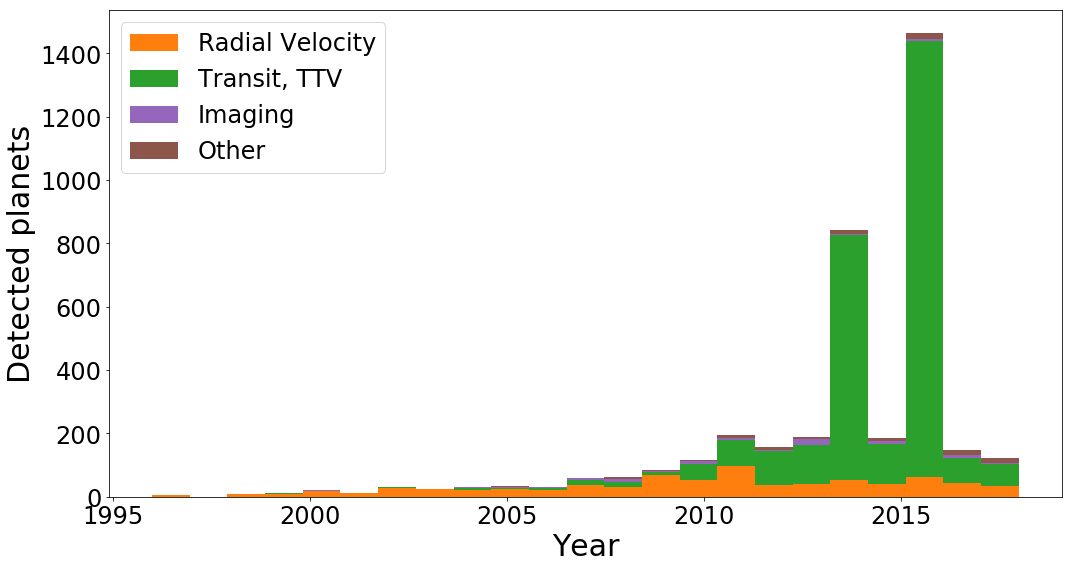

In [23]:
# make mass vs period/semi-major axis plot

fig_date_number, ax_date_number = plt.subplots(1, figsize=FIGSIZE)

discoverySpan = range(1995, 2019)
print(len(discoverySpan))
perYear=[]

methods = ['Radial Velocity', 'Astrometry', 'Primary Transit', 'TTV','Primary Transit, TTV',  'Imaging', 'Microlensing',  'Pulsar', 'Other','merged']
colorList = ['C1','C5', 'C2', 'C2', 'C2','C4',  'C5', 'C5',  'C5', 'C5']

colors = {'Astrometry':'C5' , 'Primary Transit':"C2" , 'TTV':"C2" , 'Primary Transit, TTV':"C2", \
          'Microlensing': 'C5', 'Radial Velocity': 'C1', 'Pulsar': 'C5', 'Imaging':'C4','Other':'C5'}

mergedMethods =  ['Primary Transit', 'TTV' ]

subsetDF = panda_exoplanetEU.copy(deep=True)[(panda_exoplanetEU[:]['discovered'] > 1995)]
# subsetDF = panda_exoplanetEU.copy(deep=True)[(panda_exoplanetEU[:]['discovered'] > 1995) & (panda_exoplanetEU[:]['mass'] < 30*319)]
plotMethods = ['Radial Velocity','Transit, TTV', 'Imaging', 'Other']

subsetDF.replace(['Microlensing','Pulsar','Other'],'Other',inplace=True,)
subsetDF.replace(['Primary Transit', 'TTV','Primary Transit, TTV'],'Transit, TTV',inplace=True)
colorListSubset = ['C1','C2', 'C4', 'C5']


perYearmethod =  pd.DataFrame({method: subsetDF[(subsetDF[:]['detection_type'] == method)]['discovered'] 
                               for method in plotMethods}).plot.hist(ax=ax_date_number,stacked=True, 
                                                                     bins=2019-1995-1, color=colorListSubset)


# fix legend for multis:
handles, labels = ax_date_number.get_legend_handles_labels()
newLabels, newHandles = [], []
print(labels)
for handle, label in zip(handles, labels):
  if label in [u'Radial Velocity', u'Transit, TTV', u'Imaging', u'Other']:
    newLabels.append(label)
    newHandles.append(handle)
#order = [2,3,0,1]
order = [0,1,2,3]
print(newLabels)
ax_date_number.legend([newHandles[index] for index in order], [newLabels[index] for index in order],fontsize= 24)

ax_date_number.set_ylabel('Detected planets')
ax_date_number.set_xlabel('Year')
fig_date_number.tight_layout()

fig_date_number.savefig('exoplanetEU_year_method.pdf', format = 'pdf')

plt.show()

## Masses by year

Radial Velocity 769
Transit, TTV 2851
Imaging 98
Microlensing, Pulsar, Other 0
['Radial Velocity', 'Transit, TTV', 'Imaging', 'Microlensing, Pulsar, Other']
['Radial Velocity', 'Transit, TTV', 'Imaging', 'Other']


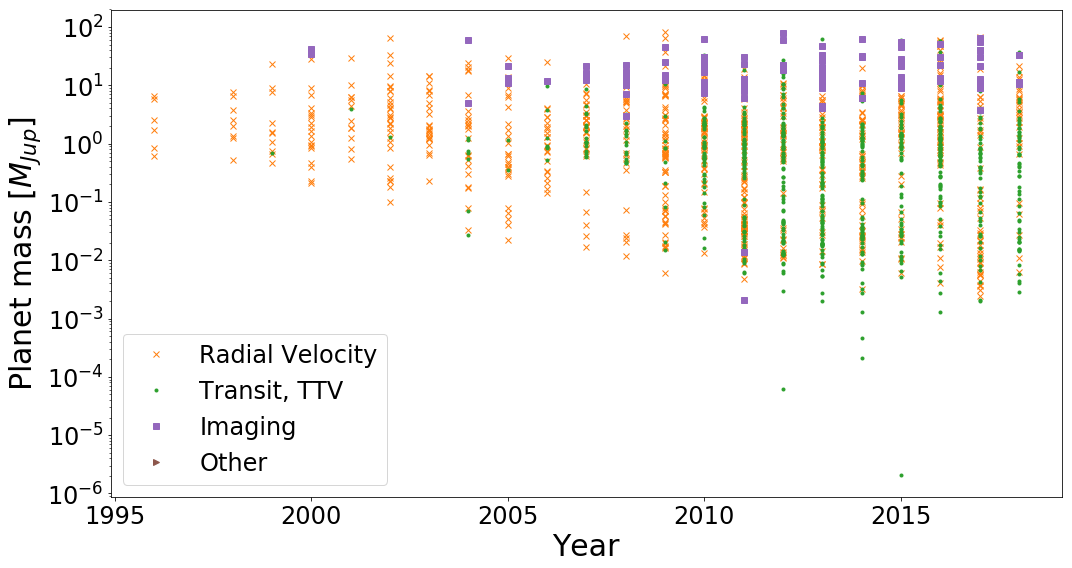

In [14]:
# make year vs mass

fig_date_mass, ax_date_mass = plt.subplots(1, figsize=FIGSIZE)

plotMethods = ['Radial Velocity','Transit, TTV','Imaging','Microlensing, Pulsar, Other']
colors =['C1','C2','C4','C5']
markers =["x", ".", "s",">"]
for method, color, mark in zip(plotMethods,colors, markers):
    print(method,len(subsetDF[(subsetDF[:]['detection_type'] == method)]['mass']))
    ax_date_mass.plot(subsetDF[(subsetDF[:]['detection_type'] == method)]['discovered'],
                      subsetDF[(subsetDF[:]['detection_type'] == method)]['mass'],mark ,label=method, color = color)

ax_date_mass.set_yscale('log')
# ax_date_mass.set_ylim([-5,500])
ax_date_mass.set_ylabel('Planet mass $[M_{Jup}]$')
ax_date_mass.set_xlabel('Year')
# ax_date_mass.legend()

# fix legend for multis:
handles, labels = ax_date_mass.get_legend_handles_labels()
newLabels, newHandles = [], []
print(labels)
for handle, label in zip(handles, labels):
  if label in [u'Radial Velocity', u'Transit, TTV', u'Imaging', u'Microlensing, Pulsar, Other']:
    newLabels.append(label.replace(u'Microlensing, Pulsar, Other',u'Other'))
    newHandles.append(handle)
order = [0,1,2,3]
print(newLabels)
ax_date_mass.legend([newHandles[index] for index in order], [newLabels[index] for index in order],fontsize= 24)


fig_date_mass.tight_layout()


fig_date_mass.savefig('exoplanetEU_year_mass.pdf', format = 'pdf')

plt.show()

## Period by year

Radial Velocity 769
Transit, TTV 2851
Imaging 98
Microlensing, Pulsar, Other 0


C:\Users\Jason\Miniconda3\envs\phd\lib\site-packages\matplotlib\axes\_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


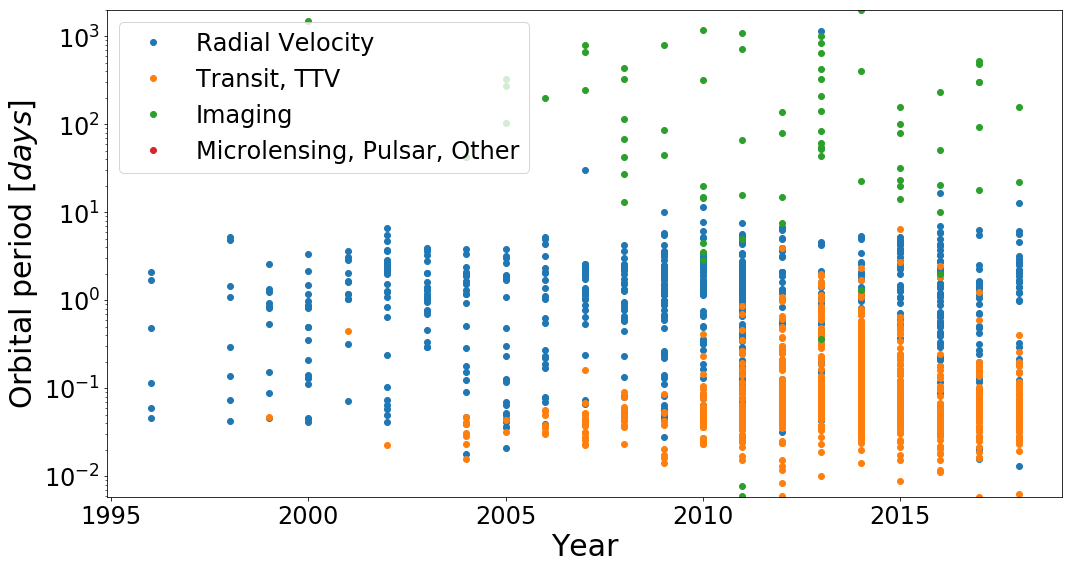

In [15]:
# make mass vs period/semi-major axis plot

fig_date_period, ax_date_period = plt.subplots(1, figsize=FIGSIZE)

plotMethods = ['Radial Velocity','Transit, TTV','Imaging','Microlensing, Pulsar, Other']

for method in plotMethods:
    print(method,len(subsetDF[(subsetDF[:]['detection_type'] == method)]['mass']))
    ax_date_period.plot(subsetDF[(subsetDF[:]['detection_type'] == method)]['discovered'],subsetDF[(subsetDF[:]['detection_type'] == method)]['semi_major_axis'],'o' ,label=method)

ax_date_period.set_yscale('log')
ax_date_period.set_ylim([0,2000])
ax_date_period.set_ylabel('Orbital period $[days]$')
ax_date_period.set_xlabel('Year')
ax_date_period.legend()
fig_date_period.tight_layout()

fig_date_period.savefig('exoplanetEU_year_period.pdf', format = 'pdf')

plt.show()

## Albedos Table

In [16]:
# select planets with albedos


numMassAndRadius =  (pd.notnull(panda_exoplanetEU['geometric_albedo']))


for name, period, a, rp, ag in zip(panda_exoplanetEU[numMassAndRadius]['name'],\
                                      panda_exoplanetEU[numMassAndRadius]['orbital_period'],\
                                      panda_exoplanetEU[numMassAndRadius]['semi_major_axis'],\
                                      panda_exoplanetEU[numMassAndRadius]['radius'],\
                                      panda_exoplanetEU[numMassAndRadius]['geometric_albedo']):
    
    fluxRatio = float(1e6*((rp*69911.)/(a*1.496e8))**2)
#     print(fluxRatio)

    print('{:s}\t&\t{:.2f}\t&\t{:.3}\t&\t{:.2f}\t&\t{:.0f}\t&\t{:.2f}&\t \\REF \t\\\\'.format(name, float(period), float(a), float(rp), float(fluxRatio),float(ag)))
        
#     print(name, period, a, rp,fluxratio, ag)



51 Peg b	&	4.23	&	0.052	&	1.90	&	292	&	0.50&	 \REF 	\\
HD 189733 b	&	2.22	&	0.0314	&	1.14	&	286	&	0.40&	 \REF 	\\
HD 209458 b	&	3.52	&	0.0475	&	1.38	&	185	&	0.04&	 \REF 	\\
Kepler-10 b	&	0.84	&	0.0169	&	0.13	&	13	&	0.58&	 \REF 	\\
Kepler-12 b	&	4.44	&	0.0556	&	1.70	&	203	&	0.09&	 \REF 	\\
Kepler-13 A b	&	1.76	&	nan	&	2.04	&	nan	&	0.33&	 \REF 	\\
Kepler-5 b	&	3.55	&	0.0506	&	1.43	&	174	&	0.16&	 \REF 	\\
Kepler-6 b	&	3.23	&	0.0457	&	1.32	&	183	&	0.07&	 \REF 	\\
Kepler-7 b	&	4.89	&	0.0625	&	1.61	&	146	&	0.32&	 \REF 	\\
Kepler-8 b	&	3.52	&	0.0483	&	1.42	&	188	&	0.11&	 \REF 	\\
WASP-104 b	&	1.76	&	0.0292	&	1.14	&	332	&	0.03&	 \REF 	\\


## mag vs flux ratio

51 Eri b 5.223 F0IV 38    1.372833e-09
dtype: float64
51 Peg b 5.49 G2 IV 39    0.000292
dtype: float64
55 Cnc e 5.95 K0IV-V 43    0.000028
dtype: float64
GJ 504 b 5.22 GOV 236    1.063633e-10
dtype: float64
HD 179949 b 6.25 F8 V 611    0.000119
dtype: float64
HD 219134 b 5.57 K3V 704    0.000003
dtype: float64
HD 75289 b 6.35 G0 V 881    0.000109
dtype: float64
HD 97658 b 6.27 K1V 939    0.000001
dtype: float64
HR 8799 b 5.96 A5V 998    6.800996e-11
dtype: float64
HR 8799 c 5.96 A5V 999    2.005395e-10
dtype: float64
HR 8799 d 5.96 A5V 1000    4.313828e-10
dtype: float64
beta Pic b 3.86 A6V 3813    3.422669e-09
dtype: float64
pi Men c 5.67 G1 IV 3839    0.000002
dtype: float64
tau Boo b 4.5 F7 V 3841    0.000116
dtype: float64


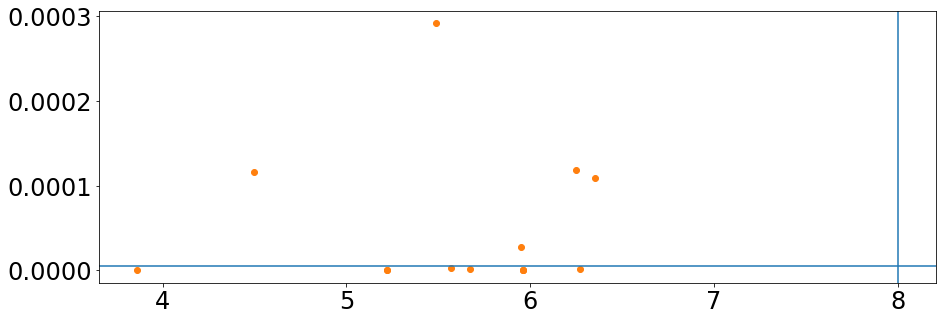

In [17]:
# make mass vs period/semi-major axis plot

fig_mag_flux, ax_mag_flux = plt.subplots(1, figsize=(15,5))

# numMassAndRadius =  (pd.notnull(panda_exoplanetEU['mass']))  & (pd.notnull(panda_exoplanetEU['radius']) &(panda_exoplanetEU['mass'] < 13))

# # print(numMassAndRadius)
# print('mass and radius: ', len(panda_exoplanetEU[numMassAndRadius]['mass']), '/', len(panda_exoplanetEU['mass']))
              
magLimit = 7

subsetMag = (panda_exoplanetEU['mag_v'] < magLimit)  & (pd.notnull(panda_exoplanetEU['radius']) &(panda_exoplanetEU['mass'] < 13))

for planet in panda_exoplanetEU[subsetMag]['name']:
    planet_data_by_name = ((panda_exoplanetEU['name'] == planet) & pd.notnull(panda_exoplanetEU['radius']))
    fluxratio = (panda_exoplanetEU[planet_data_by_name]['radius']*69911./(panda_exoplanetEU[planet_data_by_name]['semi_major_axis']*1.496e8))**2 
    ax_mag_flux.plot(panda_exoplanetEU[planet_data_by_name]['mag_v'],fluxratio,'C1o')

    for name, mag, specType in zip(panda_exoplanetEU[planet_data_by_name]['name'],panda_exoplanetEU[planet_data_by_name]['mag_v'],panda_exoplanetEU[planet_data_by_name]['star_sp_type']) :
        print(name, mag, specType ,fluxratio)

ax_mag_flux.axvline(8)
ax_mag_flux.axhline(5.e-6)
# ax_mass_radius.set_ylabel(r'$log(R_{planet})\;\;[R_{\oplus}]$', fontsize=24)
# ax_mass_radius.set_xlabel(r'$log(M_{planet})\;\;[M_{\oplus}]$', fontsize=24)
# for tick in ax_mass_radius.xaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
# for tick in ax_mass_radius.yaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
plt.show()